# IMPATTO CAMBIAMENTI CLIMATICI SULL'AGRICOLTURA

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'climate_change_impact_on_agriculture_2024.csv'
df = pd.read_csv(file_path)

sns.set(style="whitegrid")

## Dataset

Il dataset utilizzato per l'analisi è stato reperito su Kaggle (reperibile all'indirizzo https://www.kaggle.com) e contiente i dati relativi all'impatto dei cambiamenti climatici sull'agricoltura raccolti dal 1990 al 2024.

#### Struttura colonne

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Adaptation_Strate

#### Significato colonne

- *Year*: Anno dei dati
- *Country*: Paese
- *Region*: Regione del paese
- *Crop_Type*: Tipo di coltura
- *Average_Temperature_C*: Temperatura media in gradi Celsius
- *Total_Precipitation_mm*: Precipitazione totale in millimetri
- *CO2_Emissions_MT*: Emissioni di CO2 in megatonnellate
- *Crop_Yield_MT_per_HA*: Resa delle colture in megatonnellate per ettaro
- *Extreme_Weather_Events*: Numero di eventi meteorologici estremi
- *Irrigation_Access_%*: Accesso all'irrigazione in percentuale
- *Pesticide_Use_KG_per_HA*: Uso di pesticidi in kg per ettaro
- *Fertilizer_Use_KG_per_HA*: Uso di fertilizzanti in kg per ettaro
- *Soil_Health_Index*: Indice di salute del suolo
- *Adaptation_Strategies*: Strategie di adattamento utilizzate
- *Economic_Impact_Million_USD*: Impatto economico in milioni di USD

#### Dettaglio colonne

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,10000.0,2007.088700,10.084245,1990.00,1999.0000,2007.000,2016.0000,2024.00
Average_Temperature_C,10000.0,15.241299,11.466955,-4.99,5.4300,15.175,25.3400,35.00
Total_Precipitation_mm,10000.0,1611.663834,805.016815,200.15,925.6975,1611.160,2306.9975,2999.67
CO2_Emissions_MT,10000.0,15.246608,8.589423,0.50,7.7600,15.200,22.8200,30.00
Crop_Yield_MT_per_HA,10000.0,2.240017,0.998342,0.45,1.4490,2.170,2.9300,5.00
Extreme_Weather_Events,10000.0,4.980900,3.165808,0.00,2.0000,5.000,8.0000,10.00
Irrigation_Access_%,10000.0,55.248332,25.988305,10.01,32.6775,55.175,77.5825,99.99
Pesticide_Use_KG_per_HA,10000.0,24.955735,14.490962,0.00,12.5275,24.930,37.4700,49.99
Fertilizer_Use_KG_per_HA,10000.0,49.973708,28.711027,0.01,25.3900,49.635,74.8250,99.99
Soil_Health_Index,10000.0,64.901278,20.195882,30.00,47.2350,64.650,82.4725,100.00


## Temperatura media nel tempo

Tramite un grafico a linee analizziamo l'andamento della temperatura media nel corso degli anni

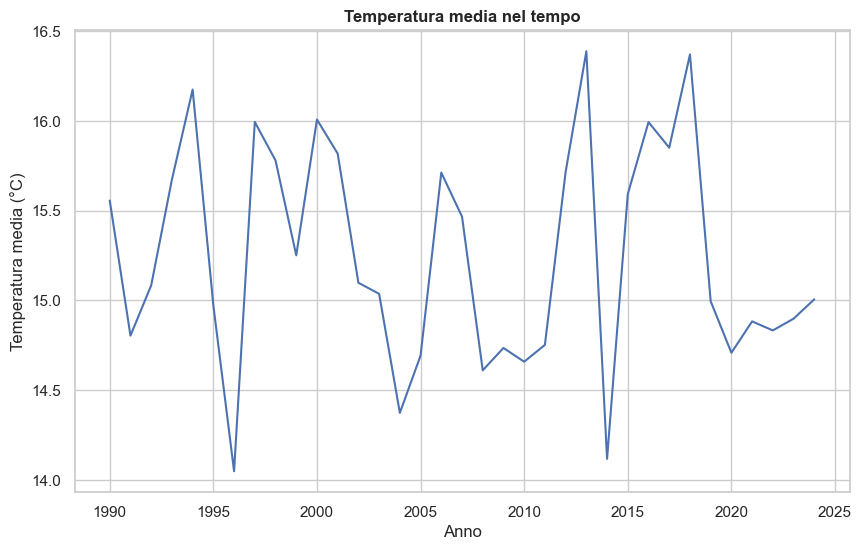

In [54]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Average_Temperature_C', errorbar=None)
plt.title('Temperatura media nel tempo', fontweight='bold')
plt.xlabel('Anno')
plt.ylabel('Temperatura media (°C)')
plt.show()

## Paesi con resa media più alta

Tramite un grafico a barre analizziamo quali sono i primi 10 paesi con resa media delle colture più alta (megatonnellate/ettaro)

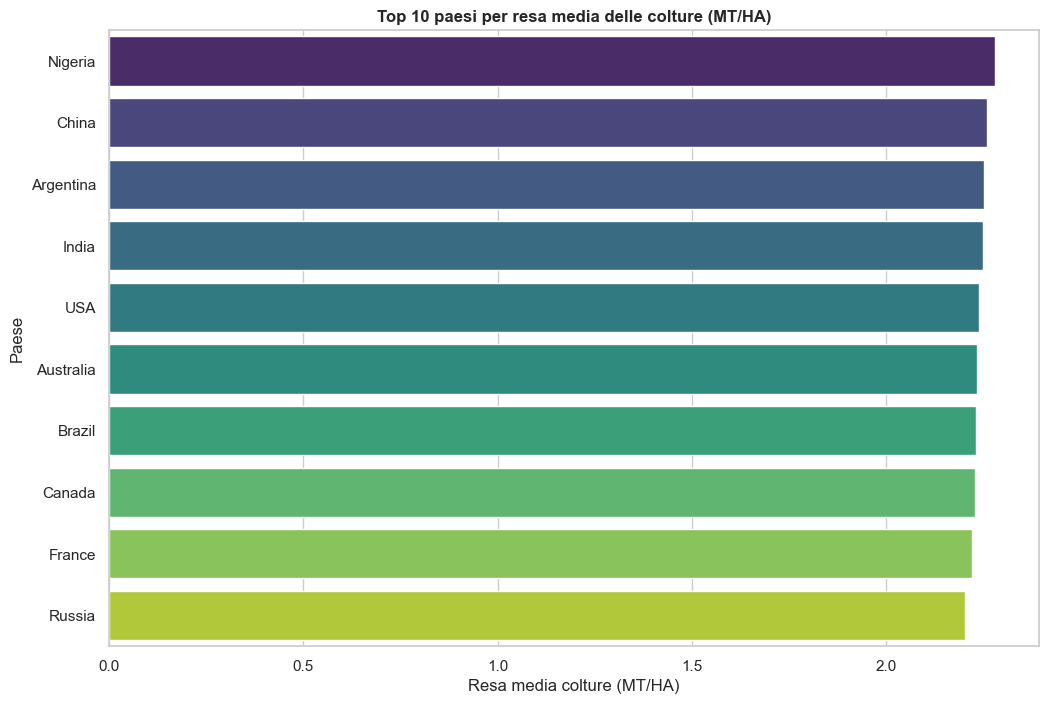

In [55]:
plt.figure(figsize=(12, 8))
avg_crop_yield_by_country = df.groupby('Country')['Crop_Yield_MT_per_HA'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_crop_yield_by_country.values, y=avg_crop_yield_by_country.index, palette='viridis')
plt.title('Top 10 paesi per resa media delle colture (MT/HA)', fontweight='bold')
plt.xlabel('Resa media colture (MT/HA)')
plt.ylabel('Paese')
plt.show()

## Emissioni CO2 rispetto all'impatto economico

Tramite un grafico a dispersione rappresentiamo le emissioni di CO2 rispetto all'impatto economico, con i vari punti colorati per paese

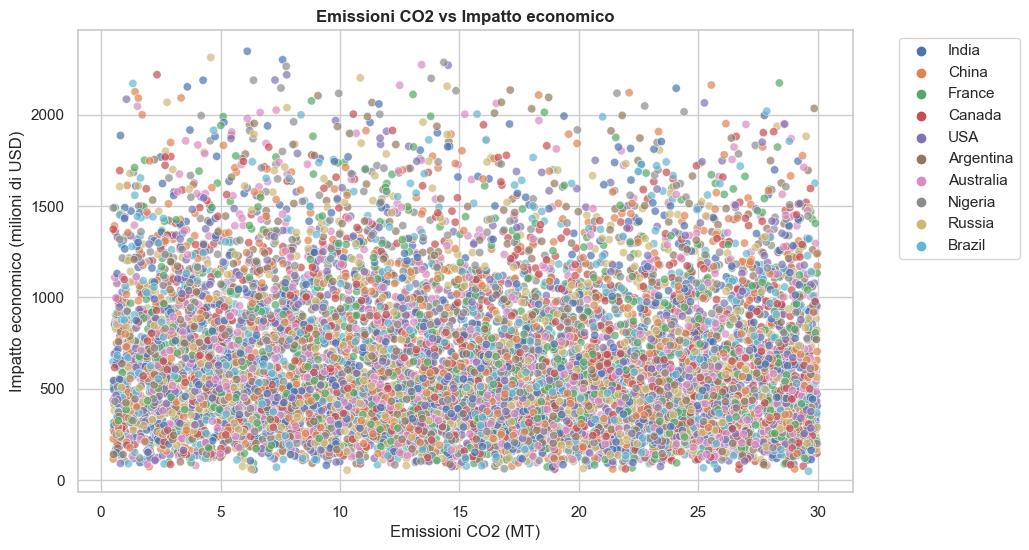

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CO2_Emissions_MT', y='Economic_Impact_Million_USD', hue='Country', alpha=0.7)
plt.title('Emissioni CO2 vs Impatto economico', fontweight='bold')
plt.xlabel('Emissioni CO2 (MT)')
plt.ylabel('Impatto economico (milioni di USD)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

## Indice salute suolo

Tramite un diagramma a scatola analizziamo l'indice di salute del suolo tra diverse regioni

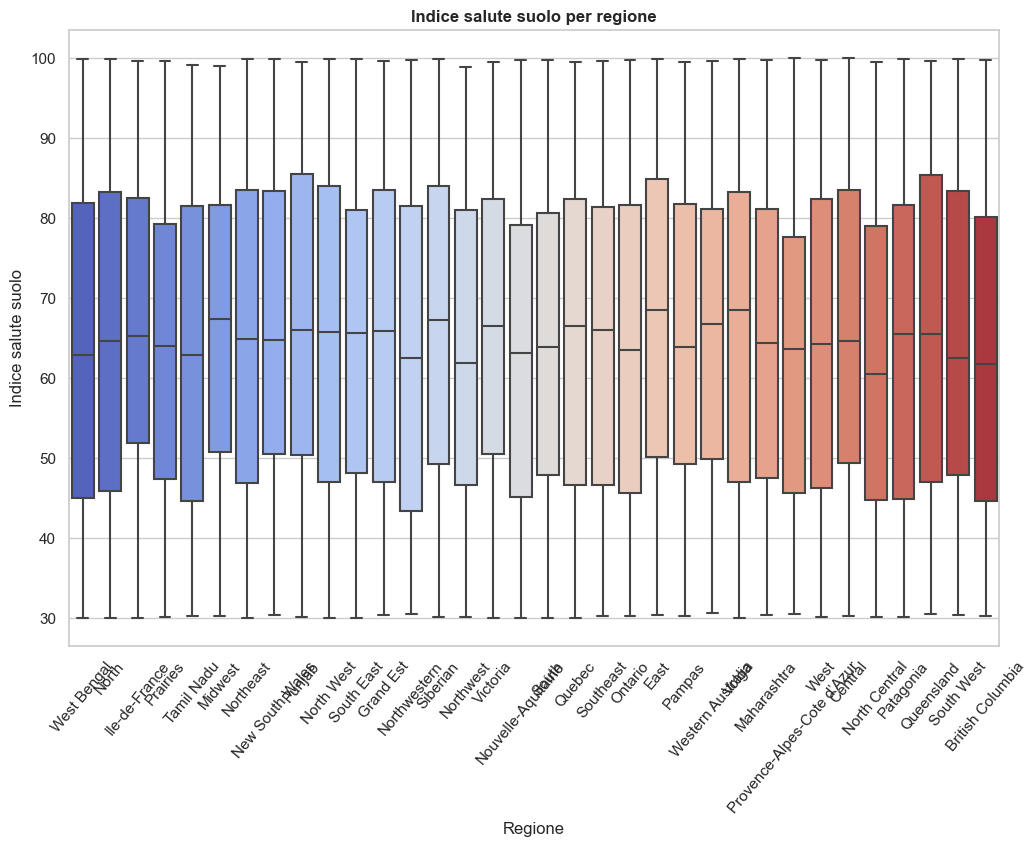

In [57]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Region', y='Soil_Health_Index', palette='coolwarm')
plt.title('Indice salute suolo per regione', fontweight='bold')
plt.xlabel('Regione')
plt.ylabel('Indice salute suolo')
plt.xticks(rotation=50)
plt.show()

## Uso fertilizzanti 

Tramite un istogramma analizziamo la distribuzione dell'uso di fertilizzanti (kg/ettaro)

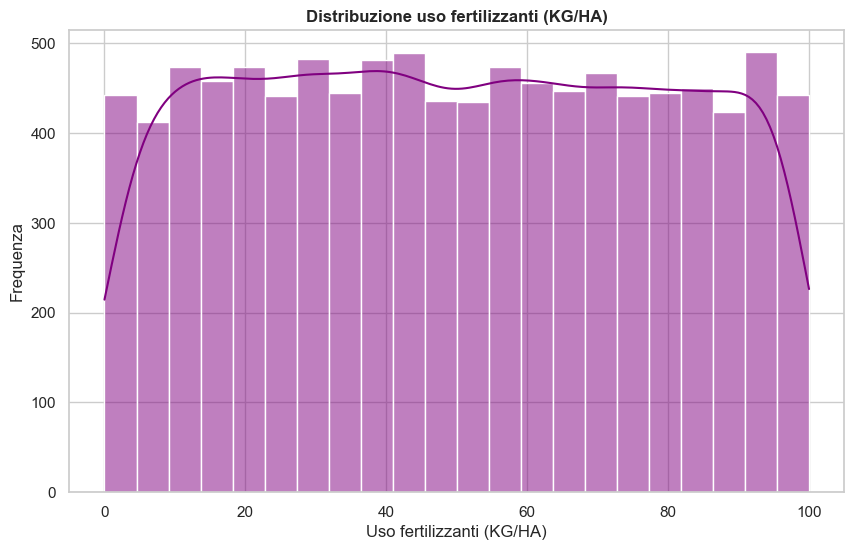

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Fertilizer_Use_KG_per_HA'], kde=True, color='purple')
plt.title('Distribuzione uso fertilizzanti (KG/HA)', fontweight='bold')
plt.xlabel('Uso fertilizzanti (KG/HA)')
plt.ylabel('Frequenza')
plt.show()

## Impatto economico per strategia di adattamento

Tramite un grafico a barre analizziamo l'impatto economico medio per le varie strategie di adattamento

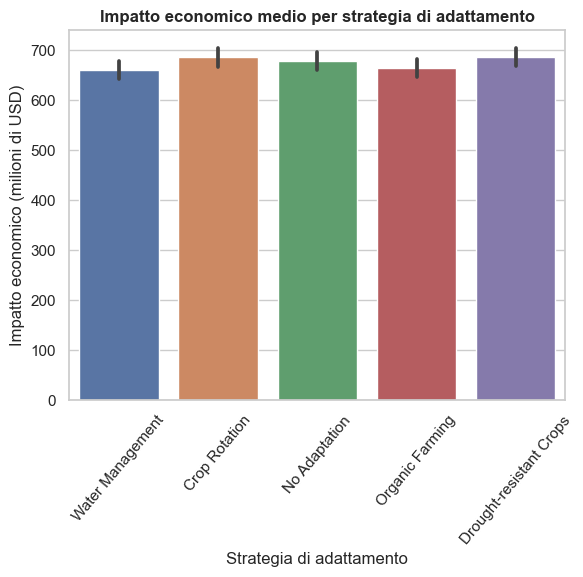

In [59]:
sns.barplot(x='Adaptation_Strategies', y='Economic_Impact_Million_USD', data=df, estimator='mean')
plt.title('Impatto economico medio per strategia di adattamento', fontweight='bold')
plt.xlabel('Strategia di adattamento')
plt.ylabel('Impatto economico (milioni di USD)')
plt.xticks(rotation=50)
plt.show()

## Tipologie di colture

Tramite un grafico a torta analizziamo la proporzione fra i primi 5 tipi di colture

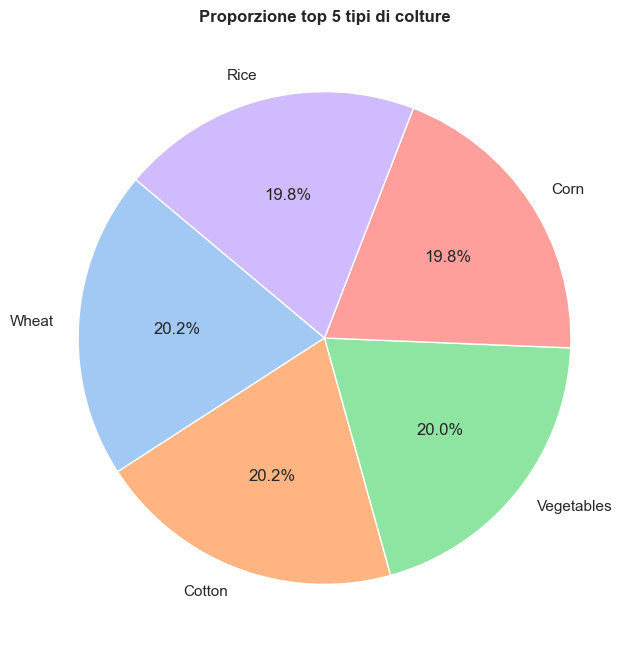

In [60]:
plt.figure(figsize=(10, 8))
crop_type_proportion = df['Crop_Type'].value_counts().head(5)
plt.pie(crop_type_proportion, labels=crop_type_proportion.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proporzione top 5 tipi di colture', fontweight='bold')
plt.show()

## Precipitazioni per coltura

Tramite un grafico a violino analizziamo la distribuzione delle precipitazioni totali per tipo di coltura

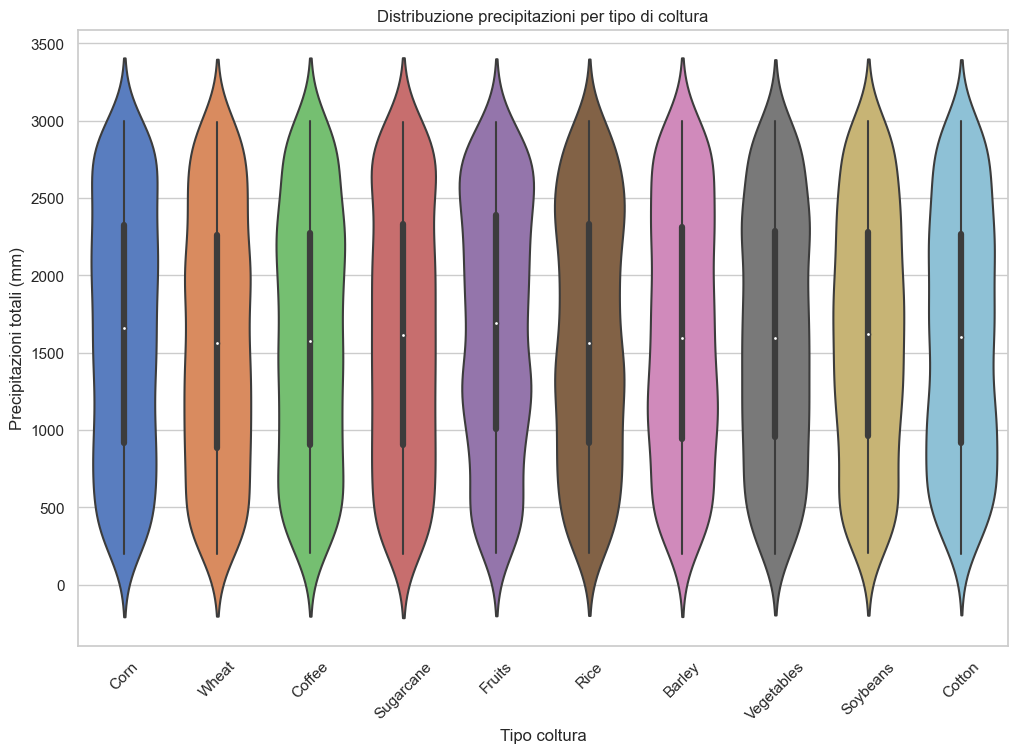

In [61]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='Crop_Type', y='Total_Precipitation_mm', palette='muted')
plt.title('Distribuzione precipitazioni per tipo di coltura')
plt.xlabel('Tipo coltura')
plt.ylabel('Precipitazioni totali (mm)')
plt.xticks(rotation=45)
plt.show()